# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [38]:
!pip install geopandas
!pip install pygeos
!pip install rtree

In [39]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [40]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [41]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [42]:
# Read shapefile
ph = gpd.read_file('/content/drive/MyDrive/Year 4/AY 2020-2021 Term 2/DATASCI/GeospatialDATA/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [43]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

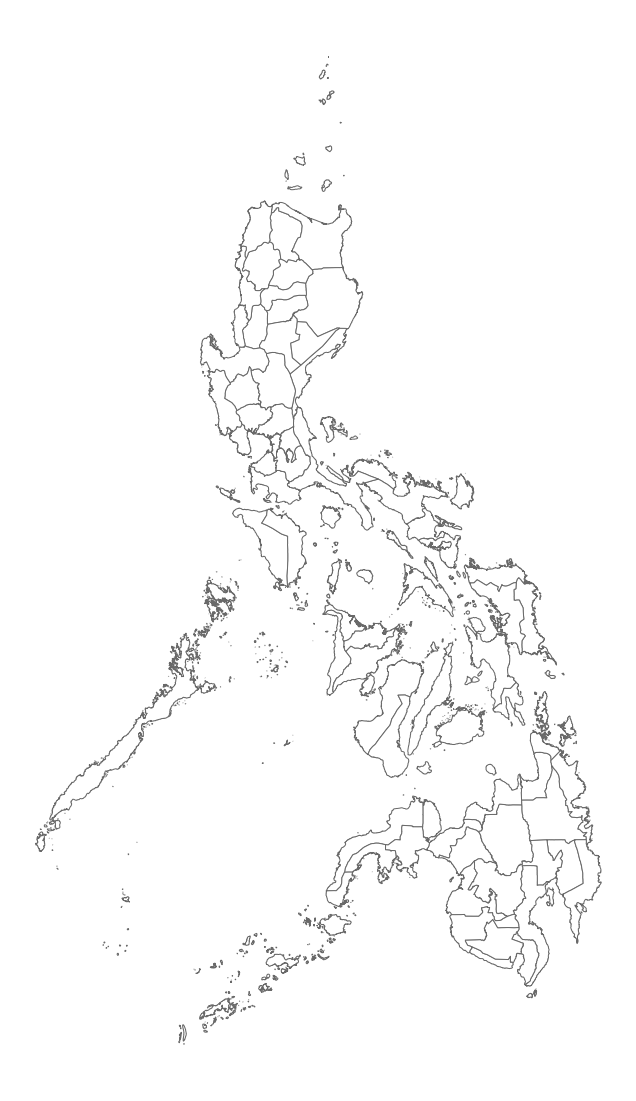

In [44]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [45]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/drive/MyDrive/Year 4/AY 2020-2021 Term 2/DATASCI/GeospatialDATA/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

In [11]:
metro_manila = gpd.sjoin(healthsites, ph[ph.NAME_1=="Metropolitan Manila"], op='within')
cavite = gpd.sjoin(healthsites, ph[ph.NAME_1=="Cavite"], op='within')

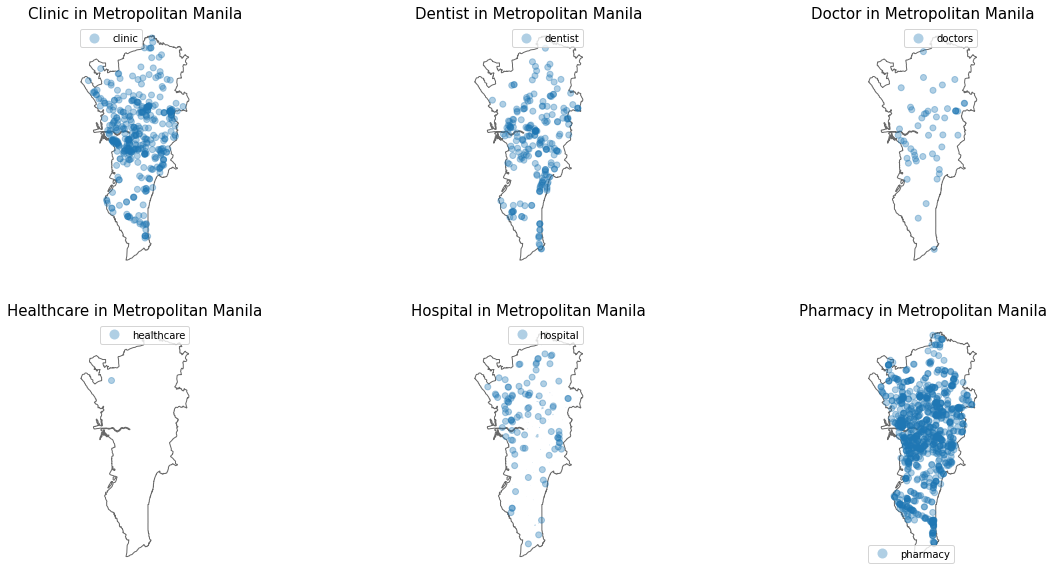

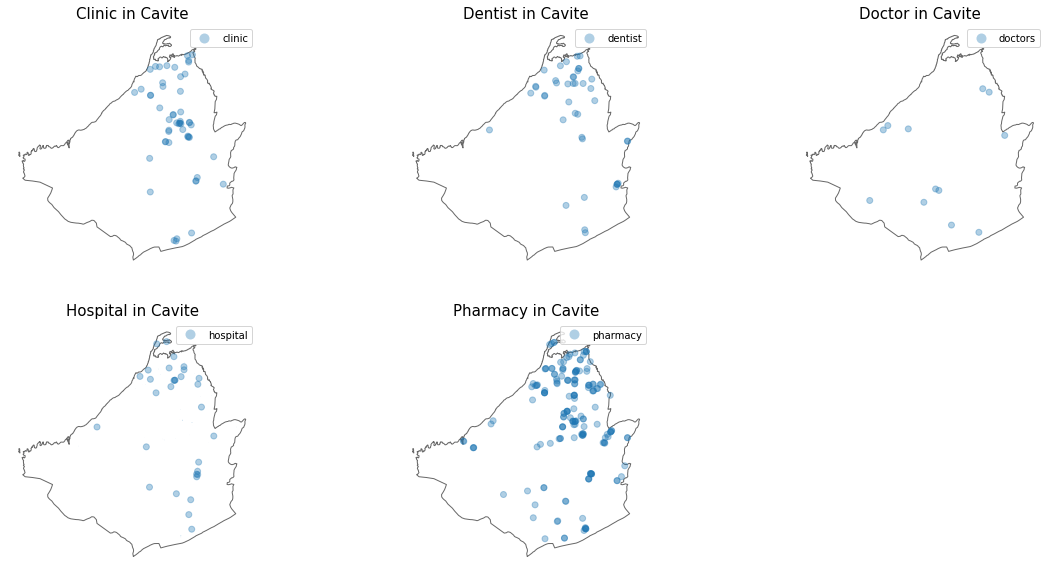

In [46]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 3, 1)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="clinic"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinic in Metropolitan Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 2)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="dentist"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentist in Metropolitan Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 3)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="doctors"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctor in Metropolitan Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 4)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="healthcare"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Healthcare in Metropolitan Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 5)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospital in Metropolitan Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 6)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
metro_manila[metro_manila.amenity=="pharmacy"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacy in Metropolitan Manila', fontsize=15)
ax.axis('off');


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 3, 1)
ph[ph.NAME_1=="Cavite"].plot(ax=ax, color='white', edgecolor='dimgray')
cavite[cavite.amenity=="clinic"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinic in Cavite', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 2)
ph[ph.NAME_1=="Cavite"].plot(ax=ax, color='white', edgecolor='dimgray')
cavite[cavite.amenity=="dentist"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentist in Cavite', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 3)
ph[ph.NAME_1=="Cavite"].plot(ax=ax, color='white', edgecolor='dimgray')
cavite[cavite.amenity=="doctors"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctor in Cavite', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 4)
ph[ph.NAME_1=="Cavite"].plot(ax=ax, color='white', edgecolor='dimgray')
cavite[cavite.amenity=="hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospital in Cavite', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 3, 5)
ph[ph.NAME_1=="Cavite"].plot(ax=ax, color='white', edgecolor='dimgray')
cavite[cavite.amenity=="pharmacy"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacy in Cavite', fontsize=15)
ax.axis('off');